In [2]:
from scipy.io import loadmat
from skimage.segmentation import slic, mark_boundaries
from skimage.util import img_as_float
import matplotlib.pyplot as plt
import cv2

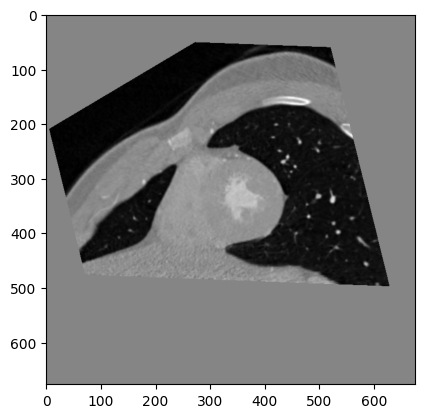

In [145]:
mat = loadmat('01_CHAVE.mat')
imagen1 = (mat['volumenes'][:,:,2])

plt.imshow(imagen1,cmap=plt.cm.gray)
plt.imsave('volumen2.png',imagen1)

(array([  0,   0,   0, ..., 676, 676, 676], dtype=int64), array([  0,   1,   2, ..., 672, 673, 674], dtype=int64))


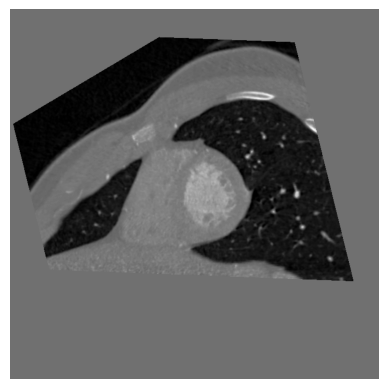

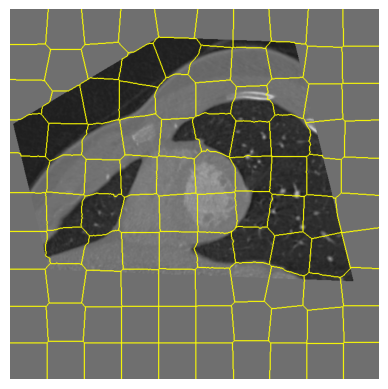

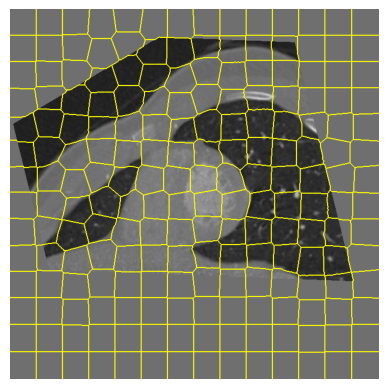

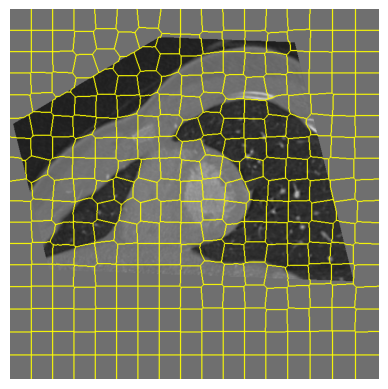

In [157]:

image = img_as_float(plt.imread('volumen0.png'))
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
print(image.nonzero())
fig = plt.figure("Superpixels -- original")
ax = fig.add_subplot(1,1,1)
ax.imshow(image,cmap=plt.cm.gray)
plt.axis('off')
for numSegments in (100,200,300):
  segments = slic(image, n_segments=numSegments,compactness=0.1)
  
  fig = plt.figure("Superpixels -- %d" %(numSegments))
  ax = fig.add_subplot(1,1,1)
  ax.imshow(mark_boundaries(image, segments))
  plt.axis('off')

plt.show()

In [77]:
vol0 = plt.imread('volumen0.png')
vol0 = cv2.cvtColor(vol0,cv2.COLOR_RGB2GRAY)
# vol0 = img_as_float(vol0)
segm = slic(vol0,150,0.1)
print(segm)

[[  1   1   1 ...  12  12  12]
 [  1   1   1 ...  12  12  12]
 [  1   1   1 ...  12  12  12]
 ...
 [122 122 122 ... 126 126 126]
 [122 122 122 ... 126 126 126]
 [122 122 122 ... 126 126 126]]


In [27]:
import numpy as np
def getSuperpixel(img: np.ndarray,lbl:np.ndarray,id: int):
  shp = img.shape
  res = np.zeros(shp)
  for x in range(img.shape[0]):
    for y in range(img.shape[1]):
      res[x,y] = img[x,y] if lbl[x,y] == id else 0.0
  return res
  

0.11958824 0.844502
0.0 0.4368784725666046
(677, 675) (677, 675)


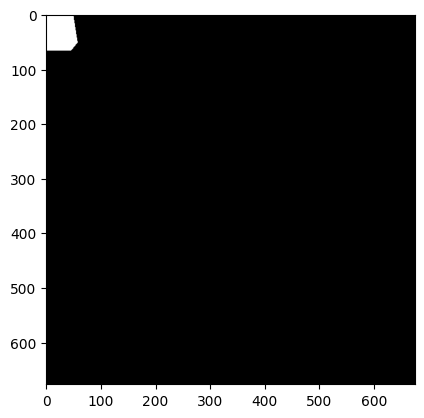

In [144]:
test = getSuperpixel(vol0,segm,1)
print(vol0.min(), vol0.max())
print(test.min(), test.max())
print(vol0.shape,test.shape)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.imshow(test, cmap=plt.cm.gray)

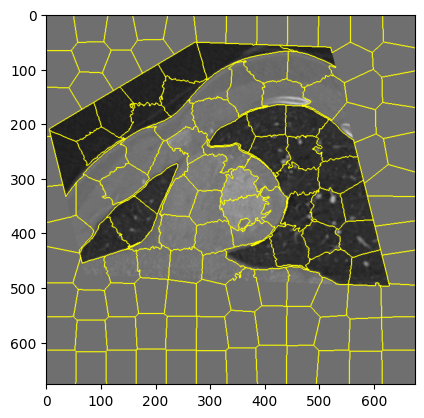

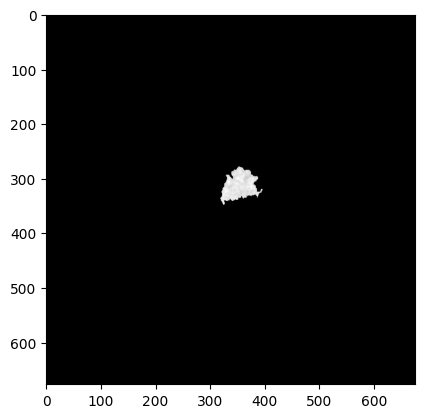

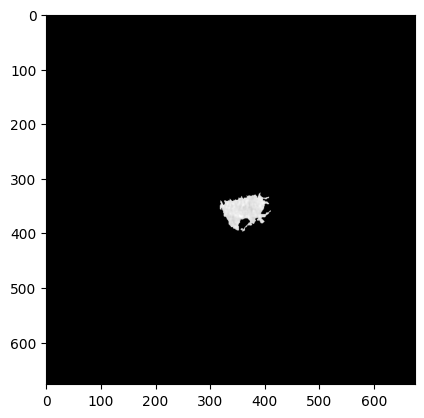

In [72]:

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.imshow(mark_boundaries(vol0,segm), cmap=plt.cm.gray)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.imshow(getSuperpixel(vol0,segm,63), cmap=plt.cm.gray)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.imshow(getSuperpixel(vol0,segm,72), cmap=plt.cm.gray)
plt.show()

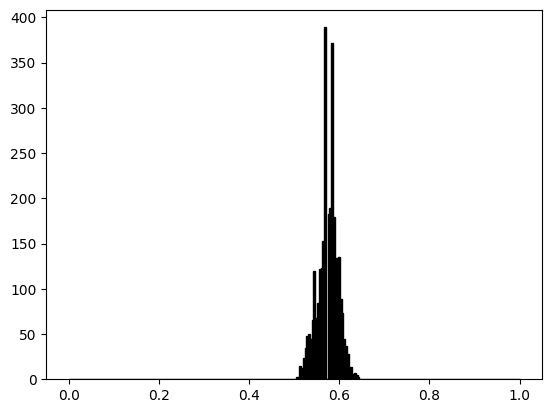

In [81]:
# histogram, bins = np.histogram(test[test != 0],bins=256, range=(0,1))

a,b,c=plt.hist(test[test != 0].ravel(),bins=256,range=(0.0,1.0),fc='k',ec='k')

In [105]:
reg1 = getSuperpixel(vol0,segm,63)
reg2 = getSuperpixel(vol0,segm,72)

# plt.imshow(reg2)

# hist = cv2.calcHist([reg1[reg1!=0]],[0],None,[256],[0.0,1.0])

# counts2, bins2, plot2 = plt.hist(reg2[reg2 != 0].ravel(),bins=256,range=(0.0,0.1),fc='k',ec='k')



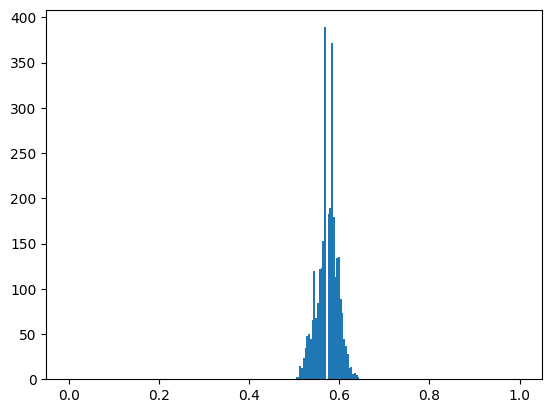

In [115]:
n1, bins1, patches1 = plt.hist(reg1[reg1 != 0].ravel(),256,[0.0,1.0])

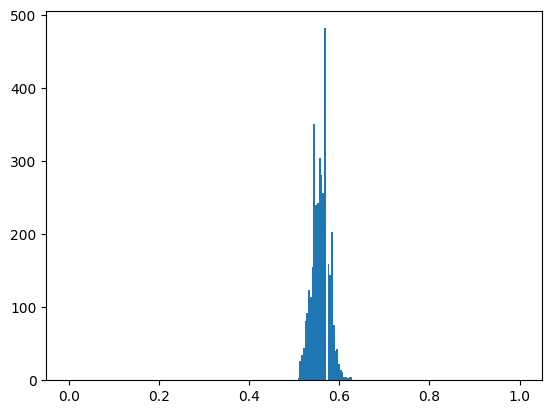

In [116]:
tmp = reg2[reg2 != 0].ravel()
n2, bins2, patches2 = plt.hist(tmp,256,(0,1))

In [139]:
def chi_distance(counts1, counts2):
  l = len(counts1)
  distance = 0
  
  for i in range(l):
    if (counts1[i] + counts2[i]):
      distance += ((counts1[i]-counts2[i])**2) / (counts1[i] + counts2[i])
  return distance

In [140]:
chi_distance(n1,n2)

1086.933910090158

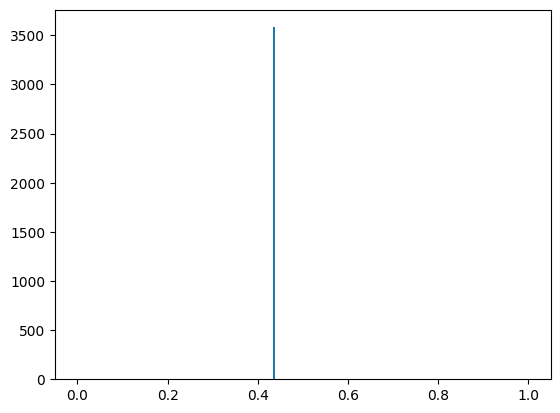

In [141]:
prueba1 = getSuperpixel(vol0,segm,1)
prueba1 = prueba1[prueba1 != 0].ravel()
n3,bins3,patches3 = plt.hist(prueba1,256,[0,1])

In [143]:
chi_distance(n2,n3)

7146.0